<a href="https://colab.research.google.com/github/mohammadameerhamza/MachineLearningBasic/blob/main/pak_temp_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ameerhamza0311","key":"c720c749bc71653b20fde3575e8660a7"}'}

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d zusmani/pakistan-temperature

  0% 0.00/8.27k [00:00<?, ?B/s]
100% 8.27k/8.27k [00:00<00:00, 8.81MB/s]


In [ ]:
!unzip pakistan-temperature.zip

Archive:  pakistan-temperature.zip
  inflating: Tempreture_1901_2016_Pakistan.csv  


In [ ]:
# !rm pakistan-temperature.zip

In [ ]:
import pandas as pd

tmp =pd.read_csv('Tempreture_1901_2016_Pakistan.csv')

In [ ]:
tmp.columns=['temp','year','month']

In [ ]:
from matplotlib import style

style.available
# returns:
['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']
style.use('seaborn-whitegrid')
#font color style



<AxesSubplot:xlabel='year'>

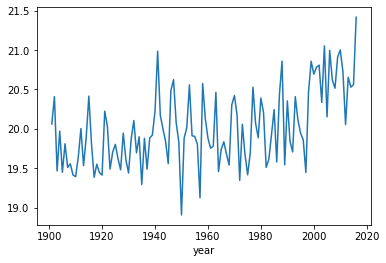

In [ ]:
temp=tmp.groupby('year')['temp'].mean()
temp.plot()

In [ ]:
tmp.index=pd.to_datetime(tmp['year'].astype(str)  + tmp['month'], format='%Y%B')

In [ ]:
tmp.index=tmp.index + pd.offsets.MonthEnd()
tmp

,temp,year,month
1901-01-31,7.72768,1901,January
1901-02-28,8.93600,1901,February
1901-03-31,16.96320,1901,March
1901-04-30,21.27410,1901,April
1901-05-31,26.04970,1901,May
...,...,...,...
2016-08-31,27.63320,2016,August
2016-09-30,26.71790,2016,September
2016-10-31,22.39820,2016,October
2016-11-30,15.76720,2016,November


In [ ]:
tmp = tmp.drop(columns=['year', 'month'])

<AxesSubplot:>

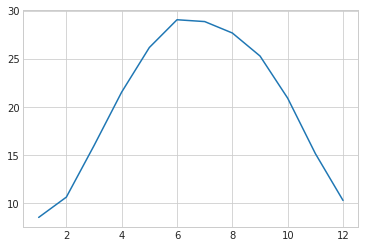

In [ ]:
temp=tmp.groupby(tmp.index.month)['temp'].mean()
temp.plot()

Trend

<AxesSubplot:>

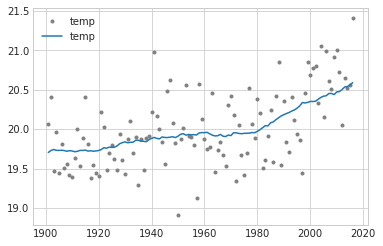

In [ ]:
avg_tmp=tmp.groupby(tmp.index.year).mean()
moving_avg=avg_tmp.rolling(
    window=40, center=True, 
    min_periods=3).mean()

ax = avg_tmp.plot(style=".", color="0.5")
moving_avg.plot(ax=ax)

<AxesSubplot:title={'center':'Noise'}>

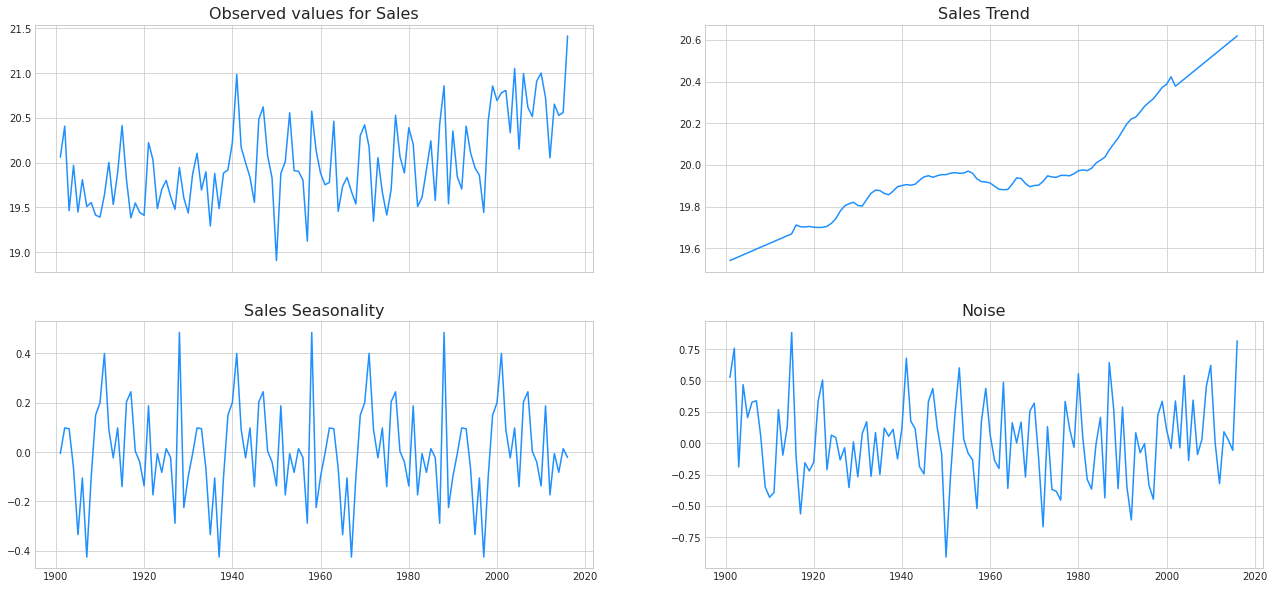

In [ ]:
#decomposition
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(avg_tmp['temp'], period=30, model='additive', extrapolate_trend='freq')
fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(22,10))
ax[0,0].set_title('Observed values for Sales', fontsize=16)
decomp.observed.plot(ax = ax[0,0], legend=False, color='dodgerblue')
ax[0,1].set_title('Sales Trend', fontsize=16)
decomp.trend.plot(ax = ax[0,1],legend=False, color='dodgerblue')

ax[1,0].set_title('Sales Seasonality', fontsize=16)
decomp.seasonal.plot(ax = ax[1,0],legend=False, color='dodgerblue')

ax[1,1].set_title('Noise', fontsize=16)
decomp.resid.plot(ax = ax[1,1],legend=False, color='dodgerblue')

<AxesSubplot:title={'center':'Noise'}>

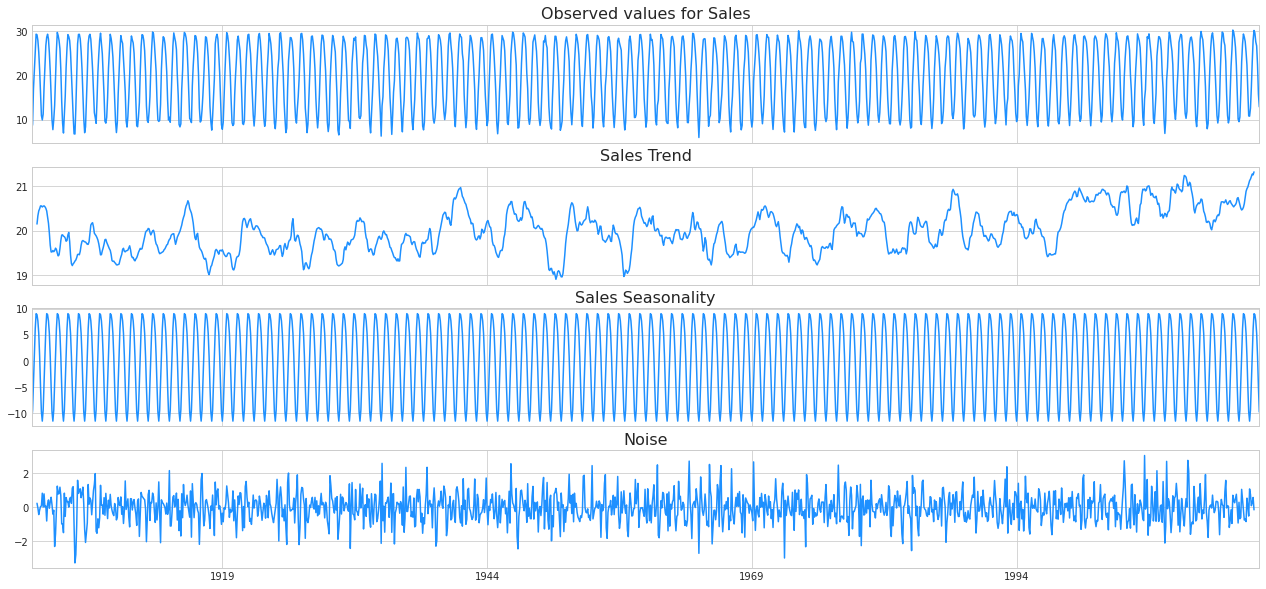

In [ ]:
#decomposition
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(tmp['temp'],period=12,model='additive')
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(22,10))
ax[0].set_title('Observed values for Sales', fontsize=16)
decomp.observed.plot(ax = ax[0], legend=False, color='dodgerblue')
ax[1].set_title('Sales Trend', fontsize=16)
decomp.trend.plot(ax = ax[1],legend=False, color='dodgerblue')

ax[2].set_title('Sales Seasonality', fontsize=16)
decomp.seasonal.plot(ax = ax[2],legend=False, color='dodgerblue')

ax[3].set_title('Noise', fontsize=16)
decomp.resid.plot(ax = ax[3],legend=False, color='dodgerblue')

In [ ]:
#adf test
from statsmodels.tsa.stattools import adfuller
p_value_adfuller = adfuller(tmp['temp'])[1]
print(p_value_adfuller)

0.0029944496012251558


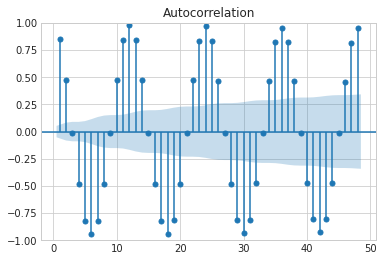

In [ ]:
plot_acf(tmp['temp'].dropna(), lags=48, zero=False);

The series has an interesting behavior, there is a sequential significative negative autocorrelation starting at lag 6 and repeating each 12 months, it's because of the difference in the seasons, if today is winter with cold temperatures in 6 months we will have higher temperatures in the summer, that's why the negative autocorrelation occurs. These temperatures usually walk in opposite directions.

In [ ]:
tmp['diff_temp']=tmp['temp'].diff(1)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


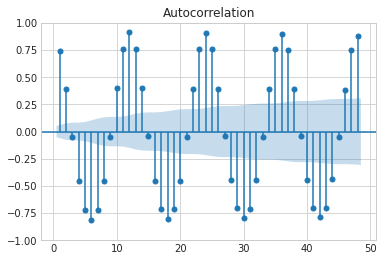

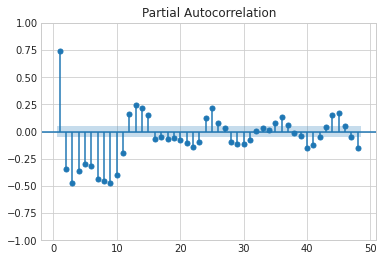

In [ ]:
#plot acf and pacf of diff
plot_acf(tmp['diff_temp'].dropna(), lags=48, zero=False);
plot_pacf(tmp['diff_temp'].dropna(), lags=48, zero=False);

PACF shows a positive spike in the first lag and a drop to negative PACF in the following lags.

This behavior between the ACF and PACF plots suggests an AR(1) model and also a first seasonal difference ( Yt−Yt−12 ). I'll plot the stationarity function again with the first seasonal difference to see if we will need some SAR(P) or SMA(Q) parameter:

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_arima =ARIMA(tmp['temp'], order=(2,1,2))
result = model_arima.fit(method_kwargs={"warn_convergence": False})

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
#mean squared error
from sklearn.metrics import mean_squared_error
predictions = result.predict(start=0, end=len(tmp['temp'])-1, dynamic=False)
mean_squared_error(tmp['temp'], predictions)


2.0749960486882

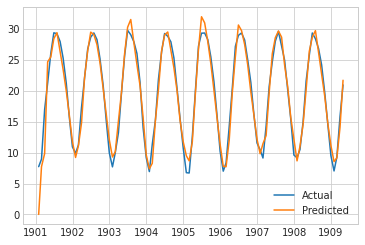

In [ ]:
#plot predictions with actual values
plt.plot(tmp['temp'][:100], label='Actual')
plt.plot(predictions[:100], label='Predicted')
plt.legend()


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   temp   No. Observations:                 1392
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2459.309
Date:                Sun, 22 May 2022   AIC                           4928.619
Time:                        04:33:27   BIC                           4954.808
Sample:                    01-31-1901   HQIC                          4938.412
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7206      0.003    496.165      0.000       1.714       1.727
ar.L2         -0.9886      0.003   -300.637      0.000      -0.995      -0.982
ma.L1         -1.8191      0.013   -140.153      0.000      -1.845      -1.794
ma.L2          0.8757      0.013     69.504      0.000       0.851       0.900
sigma2         1.9980      0.075     26.731      0.000       1.852       2.145
===================================================================================
Ljung-Box (L1) (Q):                   5.58   Jarque-Bera (JB):                12.68
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.20
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

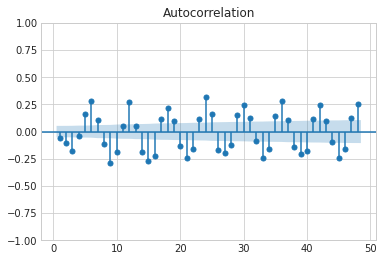

In [ ]:
#plot residuals acf
plot_acf(result.resid, lags=48, zero=False);

In [ ]:
tmp['diff_temp']=tmp['temp'].diff(12)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


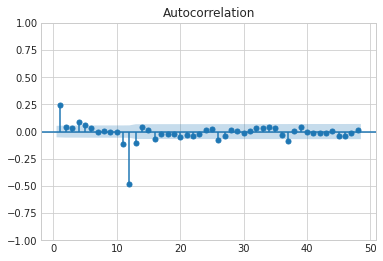

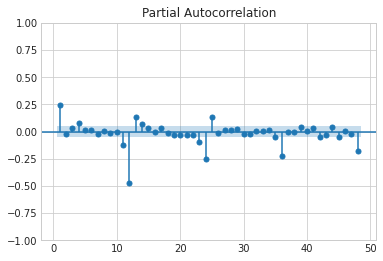

In [ ]:
#plot acf and pacf of diff
plot_acf(tmp['diff_temp'].dropna(), lags=48, zero=False);
plot_pacf(tmp['diff_temp'].dropna(), lags=48, zero=False);

In [ ]:
#sarimax model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarimax = SARIMAX(tmp['temp'], order=(2,1,2), seasonal_order=(0,1,1,12))
result_sarimax = model_sarimax.fit(disp=False)


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
#mean squared error
from sklearn.metrics import mean_squared_error
predictions_sarimax = result_sarimax.predict(start=0, end=len(tmp['temp'])-1, dynamic=False)
mean_squared_error(tmp['temp'], predictions_sarimax)

1.0972862721784502

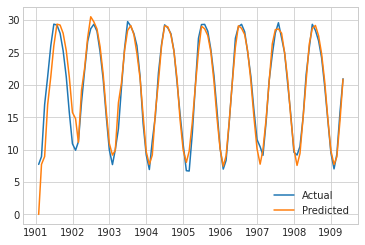

In [ ]:
#plot predictions with actual values
plt.plot(tmp['temp'][:100], label='Actual')
plt.plot(predictions_sarimax[:100], label='Predicted')
plt.legend()

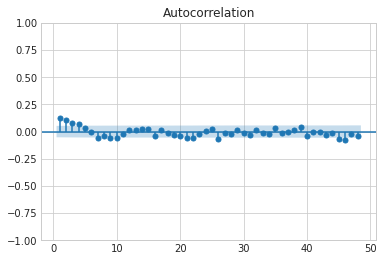

In [ ]:
#plot residuals acf
plot_acf(result_sarimax.resid, lags=48, zero=False);


In [ ]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 temp   No. Observations:                 1392
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1886.296
Date:                              Sun, 22 May 2022   AIC                           3784.593
Time:                                      04:34:22   BIC                           3815.968
Sample:                                  01-31-1901   HQIC                          3796.330
                                       - 12-31-2016                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6140      0.483     -1.271      0.204      -1.561       0.333
ar.L2          0.2285      0.113      2.022      0.043       0.007       0.450
ma.L1         -0.1217      0.485     -0.251      0.802      -1.072       0.828
ma.L2         -0.8582      0.479     -1.792      0.073      -1.797       0.081
ma.S.L12      -0.9627      0.009   -103.307      0.000      -0.981      -0.944
sigma2         0.8781      0.028     31.585      0.000       0.824       0.933
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                58.74
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.16
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
%%time
#auto arima model
from pmdarima import auto_arima
model_auto_arima = auto_arima(tmp['temp'], max_p=4, max_q=4, m=12, start_p=1, max_Q=4,max_P=4, trace=True, error_action='ignore', suppress_warnings=True,maxiter=10)

Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=5076.332, Time=3.93 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=9516.851, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=2.49 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=7016.708, Time=3.74 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=12470.766, Time=0.08 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=6109.354, Time=3.52 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=4686.224, Time=4.98 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=6515.959, Time=0.53 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=6129.330, Time=6.77 sec
 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=4849.903, Time=7.02 sec
 ARIMA(0,0,2)(1,0,0)[12] intercept   : AIC=10896.365, Time=2.11 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=5977.961, Time=4.15 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=8473.358, Time=4.74 sec
 ARIMA(1,0,3)(1,0,0)[12] intercept   : AIC=4894.222, Time=4.50 sec
 ARIMA(0,0,1)(1,0,0)[1

In [ ]:
#mean squared error
predictions_auto_arima = model_auto_arima.predict(n_periods=len(tmp['temp']))
mean_squared_error(tmp['temp'], predictions_auto_arima)


28.846066711881907

In [ ]:
#ARIMA(2,0,1)(4,0,0)[12]  
arima_model2=ARIMA(tmp['temp'], order=(2,0,1), seasonal_order=(4,0,0,12))
arima_results2=arima_model2.fit()


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
#mean squared error
from sklearn.metrics import mean_squared_error
predictions_arima2 = arima_results2.predict(start=0, end=len(tmp['temp'])-1, dynamic=False)
mean_squared_error(tmp['temp'], predictions_arima2)


1.337883635925878

LSTM

In [ ]:
df=tmp.copy()
df['date']=tmp.index


In [ ]:
#prepare data for timeseries lstm
import numpy as np
def prepare_data(data,steps):
    X,y=list(),list()
    for i in range(len(data)-steps):
        v=data.iloc[i:(i+steps)].values
        X.append(v)
        y.append(data.iloc[i+steps])
    return np.array(X),np.array(y)

    

In [ ]:
X,y=prepare_data(df['temp'],12)


In [ ]:
y

array([ 9.90868, 11.2238 , 17.3237 , ..., 22.3982 , 15.7672 , 12.8763 ])

In [ ]:
#lstm model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(12,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
1380/1380 - 7s - loss: 56.6997 - 7s/epoch - 5ms/step
Epoch 2/10
1380/1380 - 3s - loss: 4.8717 - 3s/epoch - 2ms/step
Epoch 3/10
1380/1380 - 3s - loss: 3.1064 - 3s/epoch - 2ms/step
Epoch 4/10
1380/1380 - 3s - loss: 2.6472 - 3s/epoch - 2ms/step
Epoch 5/10
1380/1380 - 3s - loss: 2.3033 - 3s/epoch - 2ms/step
Epoch 6/10
1380/1380 - 3s - loss: 2.1649 - 3s/epoch - 2ms/step
Epoch 7/10
1380/1380 - 3s - loss: 2.0591 - 3s/epoch - 2ms/step
Epoch 8/10
1380/1380 - 3s - loss: 2.0814 - 3s/epoch - 2ms/step
Epoch 9/10
1380/1380 - 3s - loss: 1.9314 - 3s/epoch - 2ms/step
Epoch 10/10
1380/1380 - 3s - loss: 1.9514 - 3s/epoch - 2ms/step


ValueError: ignored

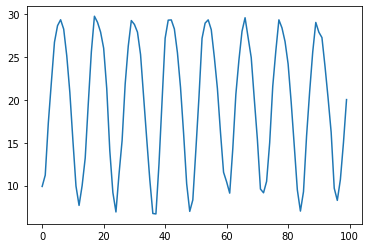

In [ ]:
#predict
import matplotlib.pyplot as plt

predictions=model.predict(X)
#plot predictions with actual values
plt.plot(y[:100], label='Actual')
plt.plot(predictions[:100], label='Predicted')



In [29]:
features=df['temp'].values
target=df['temp'].values
#timeseriesgenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
steps=12
train_x,train_y=features[:int(len(features)*0.8)],target[:int(len(features)*0.8)]
test_x,test_y=features[int(len(features)*0.8):],target[int(len(features)*0.8):]
train_gen=TimeseriesGenerator(train_x,train_y,length=steps,batch_size=1)
test_gen=TimeseriesGenerator(test_x,test_y,length=steps,batch_size=1)

In [ ]:
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(12,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit_generator(train_gen, epochs=10, verbose=2)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


1101/1101 - 5s - loss: 78.8317 - 5s/epoch - 5ms/step
Epoch 2/10
1101/1101 - 4s - loss: 7.1928 - 4s/epoch - 3ms/step
Epoch 3/10
1101/1101 - 4s - loss: 3.8404 - 4s/epoch - 3ms/step
Epoch 4/10
1101/1101 - 4s - loss: 2.9930 - 4s/epoch - 3ms/step
Epoch 5/10
1101/1101 - 4s - loss: 2.6485 - 4s/epoch - 3ms/step
Epoch 6/10
1101/1101 - 4s - loss: 2.3226 - 4s/epoch - 3ms/step
Epoch 7/10
1101/1101 - 4s - loss: 2.3206 - 4s/epoch - 3ms/step
Epoch 8/10
1101/1101 - 4s - loss: 2.2510 - 4s/epoch - 3ms/step
Epoch 9/10
1101/1101 - 4s - loss: 2.0520 - 4s/epoch - 3ms/step
Epoch 10/10
1101/1101 - 4s - loss: 2.0996 - 4s/epoch - 3ms/step


In [41]:
predictions=model.predict(test_gen,steps=len(X_test)-steps)


In [42]:
predictions=predictions[:,11]
predictions=predictions.reshape(len(predictions),)

In [44]:
predictions=predictions.reshape(len(predictions),)
predictions[0]

20.696716

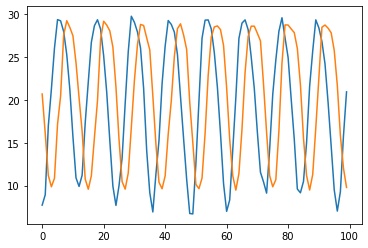

In [46]:
plt.plot(df['temp'][:100].values, label='Actual')
plt.plot(predictions[:100], label='Predicted')